# Frequency and Signals

In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import matplotlib
import pywt
import pandas as pd

In [2]:
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [3]:
def get_fft_values(y_values, T, N, f_s):
    # Make frequency vector (up to Nyquist frequency)
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    # Calculate FFT
    fft_values_ = fft(y_values)
    # Get absolute values of FFT (magnitude, disconsider phase here)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

In [7]:
t_n = 1 # time in seconds
N = 100000 # number of samples/points
T = t_n / N # sampling period
f_s = 1/T # sampling frequency

# time arrays
xa = np.linspace(0, t_n, num=N)
xb = np.linspace(0, t_n/4, num=int(N/4))

# frequencies used to build signals (in Hz)
frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)


Both signals below hold the same frequency content, but these frequencies are distributed differently

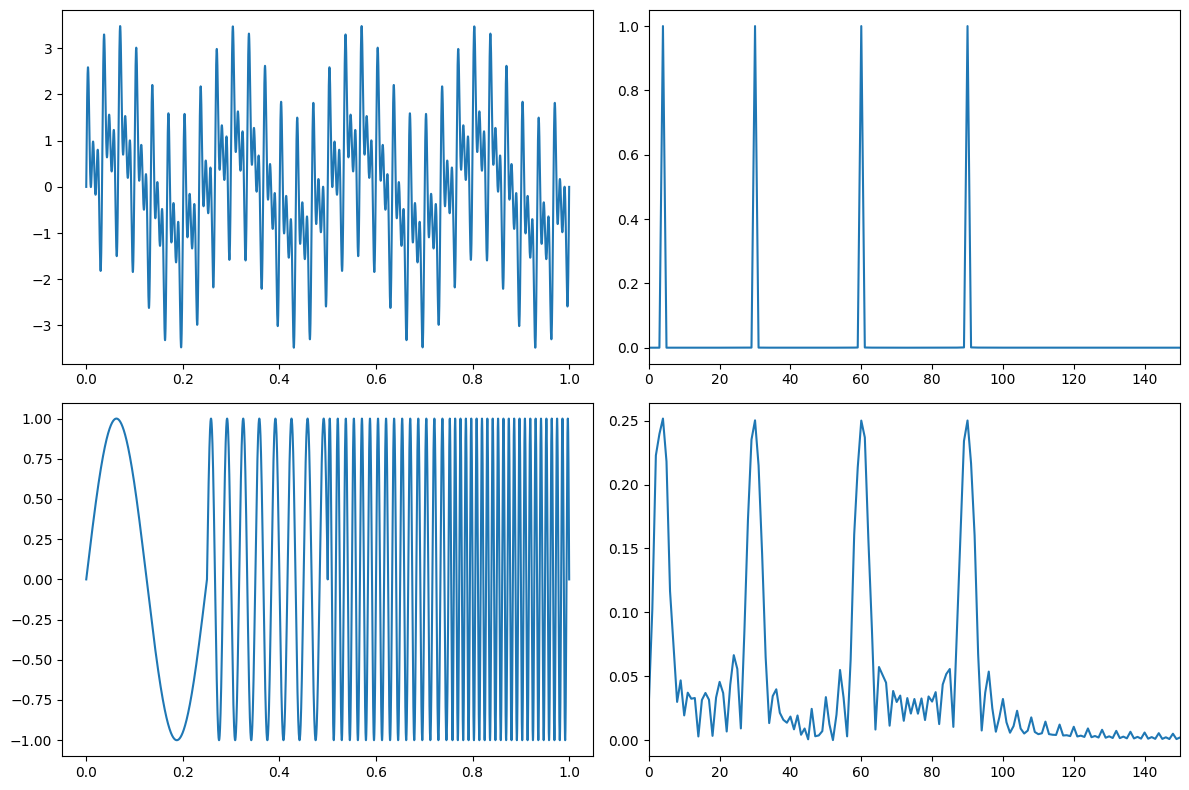

In [12]:

 
# signal composed as sum of sines
composite_signal1 = y1a + y2a + y3a + y4a
# signal composed as concatenation of sines
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])

f_values1, fft_values1 = get_fft_values(composite_signal1, T, N, f_s)
f_values2, fft_values2 = get_fft_values(composite_signal2, T, N, f_s)

fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axarr[0,0].plot(xa, composite_signal1)
axarr[1,0].plot(xa, composite_signal2)
axarr[0,1].plot(f_values1, fft_values1)
axarr[1,1].plot(f_values2, fft_values2)
axarr[0,1].set_xlim(0, 150)
axarr[1,1].set_xlim(0, 150)

plt.tight_layout()
plt.show()

## Some families of wavelets

Each type of wavelets has a different shape, smoothness and compactness and is useful for a different purpose.

The two mathematical conditions are the so-called normalization and orthogonalization constraints: each wavelet must have finite energy and zero mean (they must be integrable). Also:
- A wavelet can be orthogonal or non-orthogonal.
- A wavelet can be bi-orthogonal or not.
- A wavelet can be symmetric or not.
- A wavelet can be complex or real. If it is complex, it is usually divided into a real part representing the amplitude and an imaginary part representing the phase.
- A wavelets is normalized to have unit energy.

c:\Miniconda\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


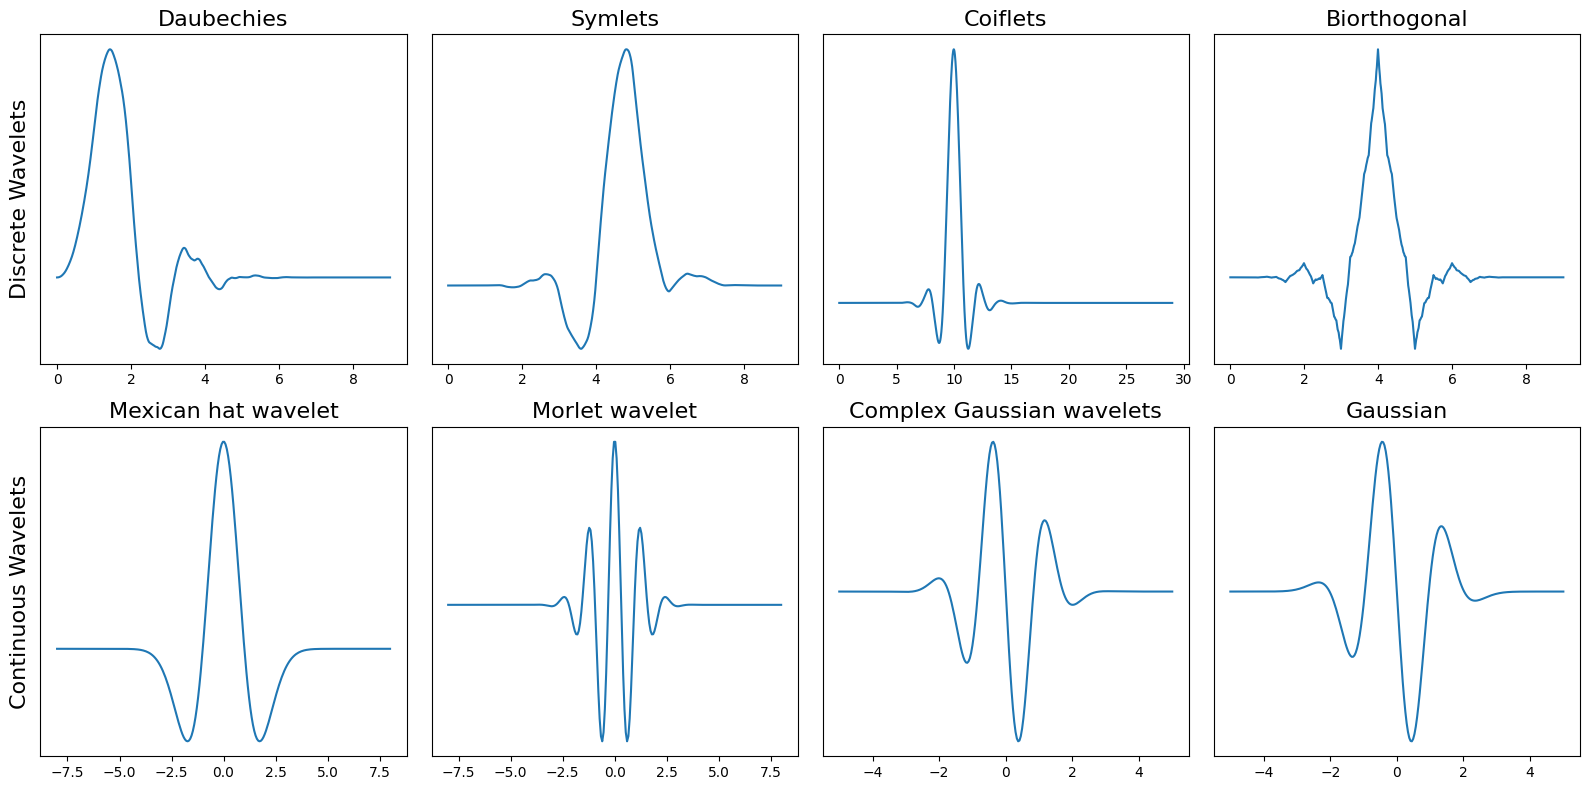

In [15]:

discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
 
list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
 
plt.tight_layout()
plt.show()

Within each wavelet family there can be a lot of different wavelet subcategories belonging to that family.

You can distinguish the different subcategories of wavelets by the number of coefficients (the number of **vanishing moments**) and the **level** of decomposition.

In the figure generated below, increasing **vanishing moments** (or **order**, like db1, db2, etc) are shown in different **columns**.

The number of vanishing moments is related to the approximation order and smoothness of the wavelet. If a wavelet has p vanishing moments, it can approximate polynomials of degree p – 1.

Increasing **level** of decomposition are show in different rows. 

The maximum level of decomposition (see pywt.dwt_max_level()) depends on the length of the input signal length and the wavelet

['db1', 'db2', 'db3', 'db4', 'db5']


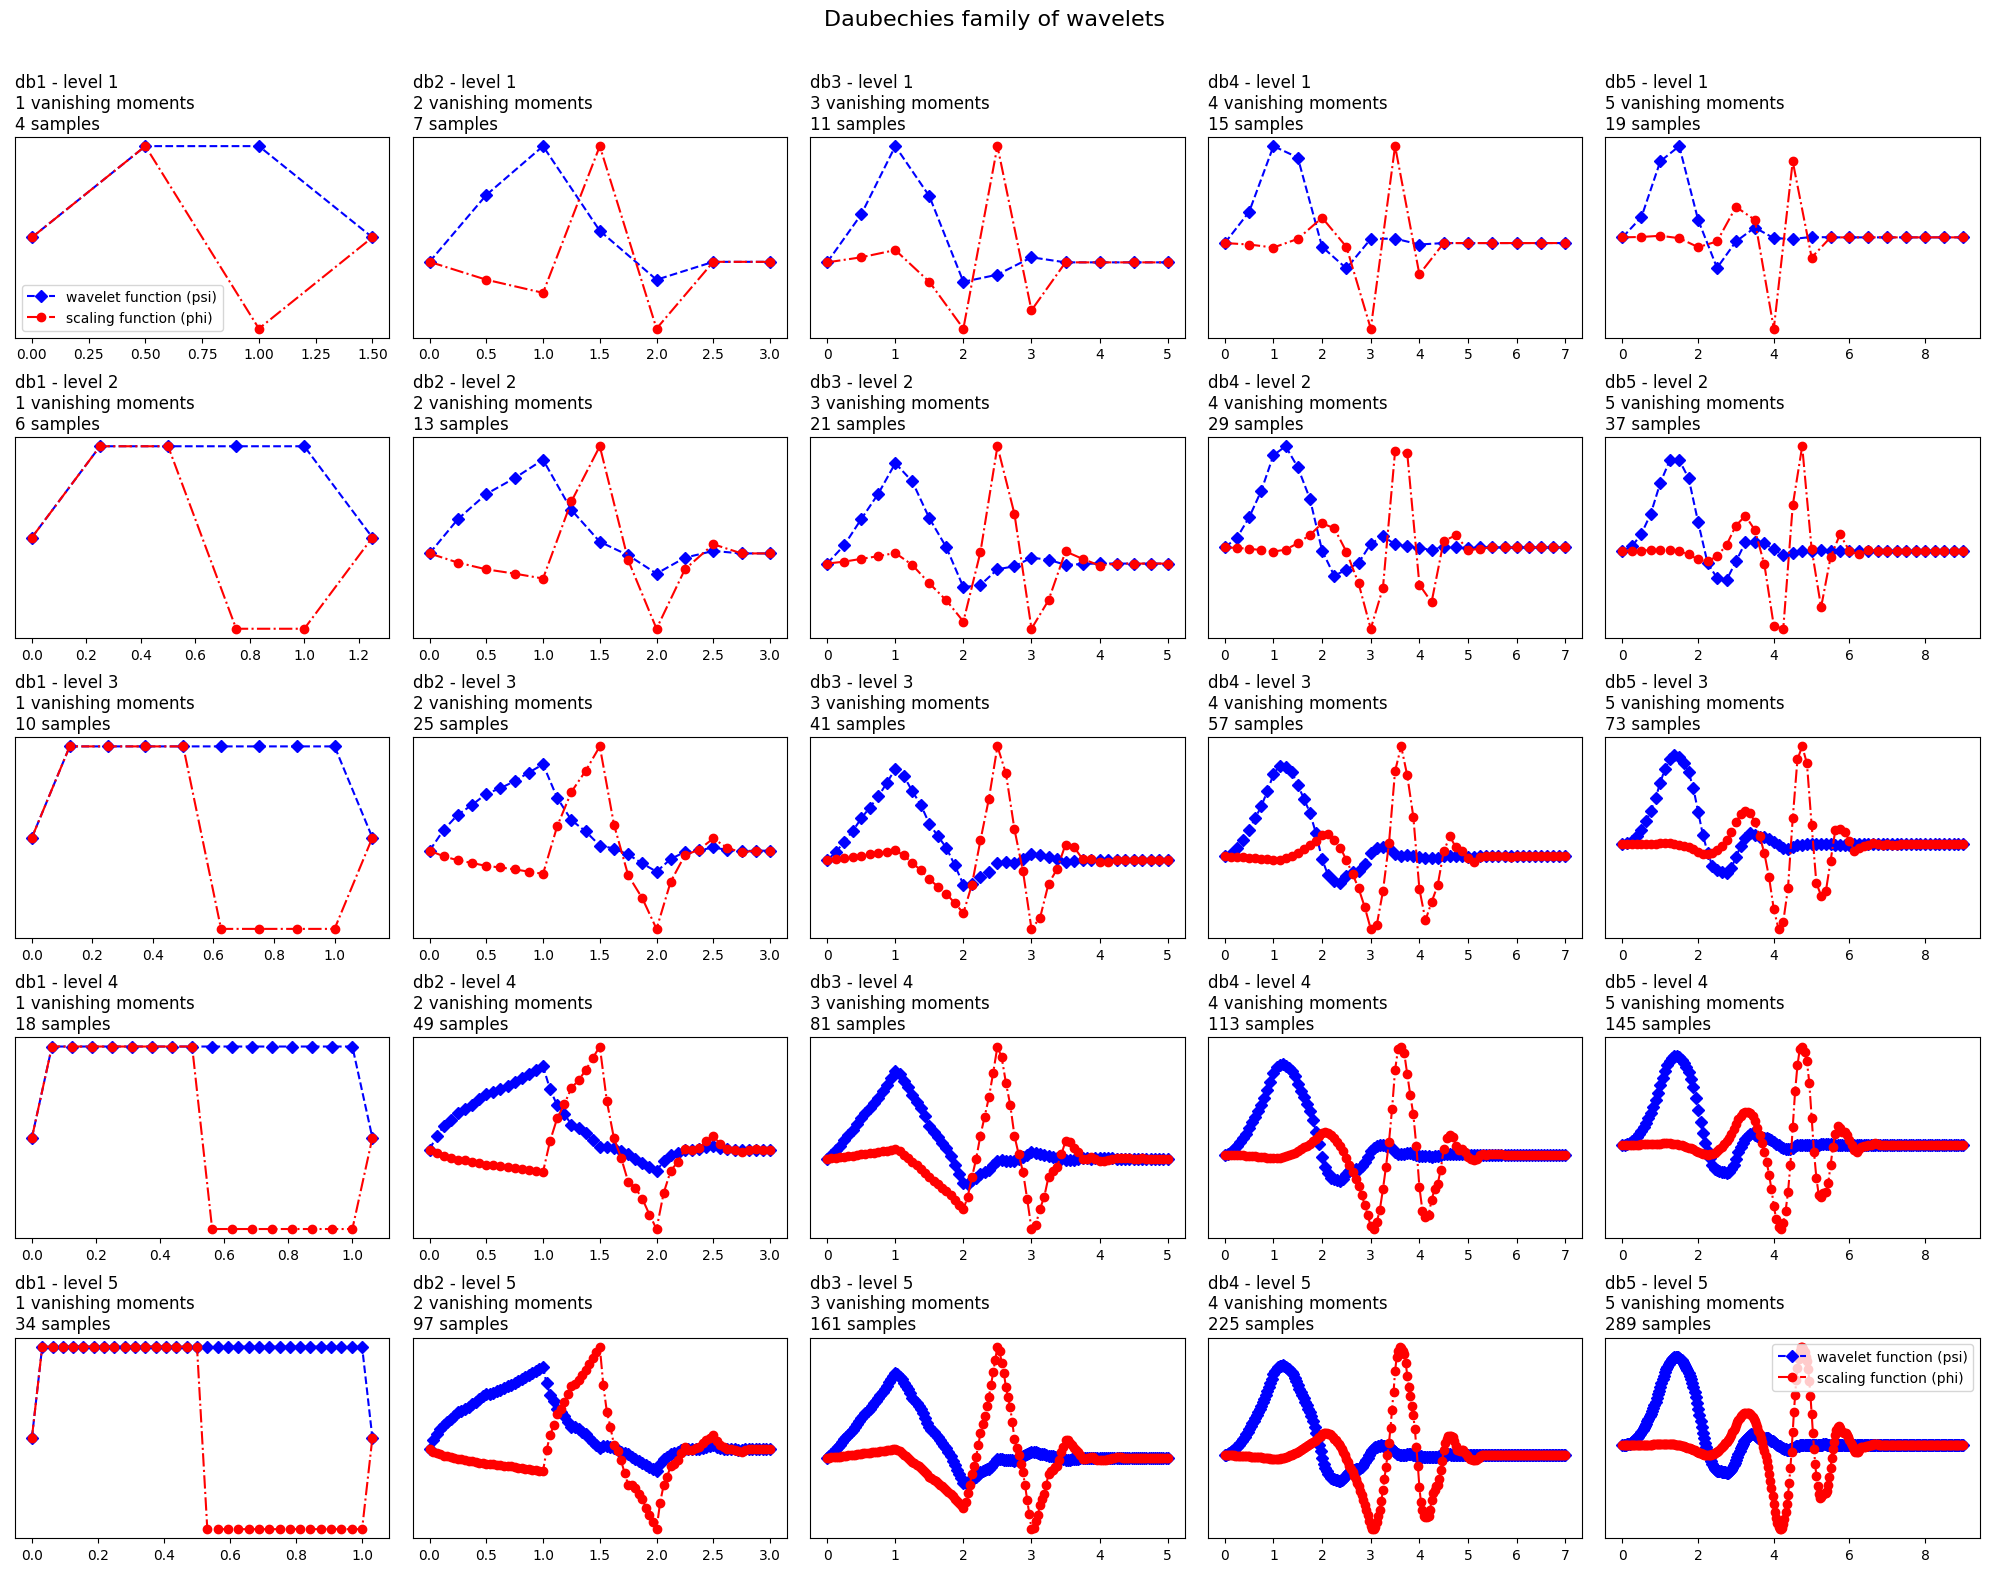

In [28]:
db_wavelets = pywt.wavelist('db')[:5]
print(db_wavelets)
# ['db1', 'db2', 'db3', 'db4', 'db5']
 
fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--', label='wavelet function (psi)')
        axarr[row_no, col_no].plot(x_values, scaling_function, 'ro-.', label='scaling function (phi)')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
axarr[0, 0].legend()
axarr[row_no, col_no].legend()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## DWT as a filter-bank

To apply the DWT on a signal, we start with the smallest scale. As we have seen before, small scales correspond with high frequencies. This means that we first analyze high frequency behavior. At the second stage, the scale increases with a factor of two (the frequency decreases with a factor of two), and we are analyzing behavior around half of the maximum frequency. At the third stage, the scale factor is four and we are analyzing frequency behavior around a quarter of the maximum frequency. And this goes on and on, until we have reached the maximum decomposition level.

Below we show an example using a chirp signal (a signal whose frequency increases with time).

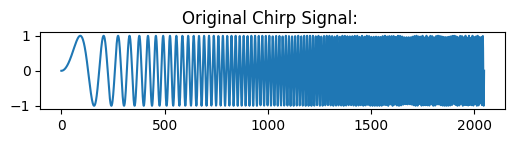

(1028,) (1028,)
(518,) (518,)
(263,) (263,)
(136,) (136,)
(72,) (72,)


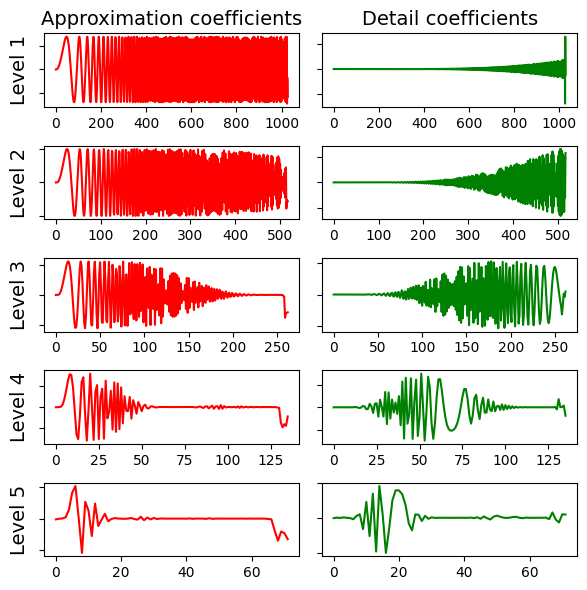

In [95]:
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    print(data.shape, coeff_d.shape)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

# Deconstructing a signal using the DWT

PyWavelets offers two different ways to deconstruct a signal.

  1. We can either apply pywt.dwt() on a signal to retrieve the approximation coefficients. Then apply the DWT on the retrieved coefficients to get the second level coefficients and continue this process until you have reached the desired decomposition level.


In [4]:
import scipy.io as sio
from collections import defaultdict, Counter
filename = './datasets/ECG_data/ECGData.mat'
ecg_data = sio.loadmat(filename)
ecg_signals = ecg_data['ECGData'][0][0][0]
ecg_labels_ = ecg_data['ECGData'][0][0][1]
ecg_labels = list(map(lambda x: x[0][0], ecg_labels_))

dict_ecg_data = defaultdict(list)
for ii, label in enumerate(ecg_labels):
    dict_ecg_data[label].append(ecg_signals[ii])

N_samples = 1000
signal = ecg_signals[0,:N_samples]

f_s = 128 #Hz
time_vector = np.linspace(0, N_samples/128, N_samples)


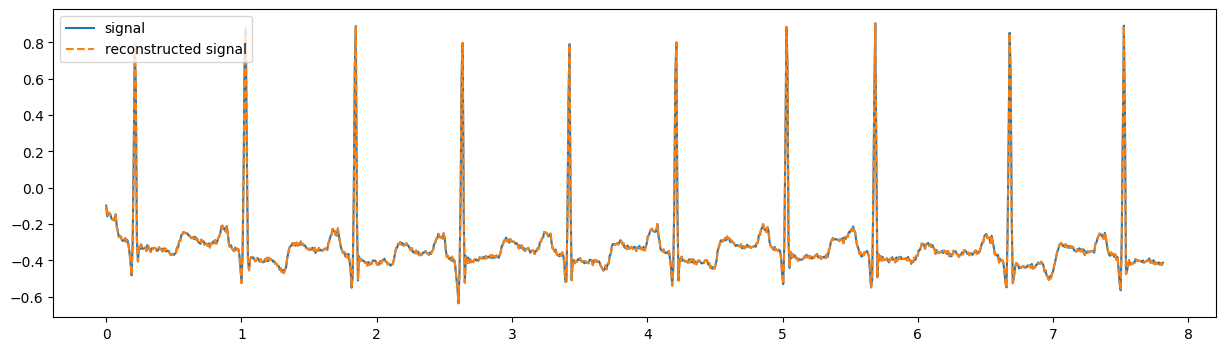

In [132]:
(cA1, cD1) = pywt.dwt(signal, 'db2', 'smooth')
reconstructed_signal = pywt.idwt(cA1, cD1, 'db2', 'smooth')
 
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(time_vector, signal, label='signal')
ax.plot(time_vector, reconstructed_signal, label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
plt.show()


  2. Or we can apply pywt.wavedec() directly and retrieve all of the the detail coefficients up to some level n. This functions takes as input the original signal and the level n and returns the one set of approximation coefficients (of the n-th level) and n sets of detail coefficients (1 to n-th level).

In [116]:
# Get max level of discrete wavelet
pywt.dwt_max_level(len(signal), 'db2')

8

(6,)
(6,)
(10,)
(18,)
(34,)
(65,)
(127,)
(252,)
(501,)


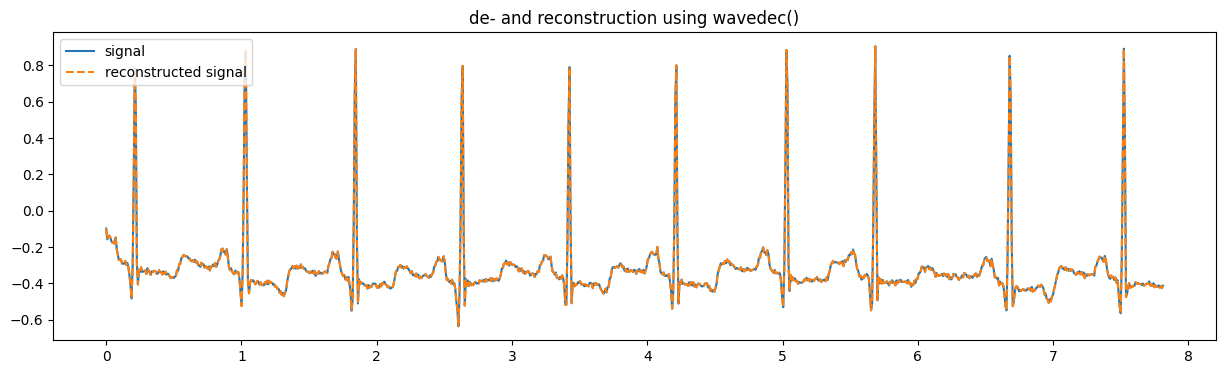

In [134]:

coeffs = pywt.wavedec(signal, 'db2', level=8)
for c in coeffs:
    print(c.shape)
reconstructed_signal = pywt.waverec(coeffs, 'db2')
 
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(time_vector, signal, label='signal')
ax.plot(time_vector, reconstructed_signal, label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()

# Removing (high-frequency) noise using the DWT

Using soft thresholding on all detail coefficients.

(6,)
(6,)
(10,)
(18,)
(34,)
(65,)
(127,)
(252,)
(501,)
(6,)
(6,)
(10,)
(18,)
(34,)
(65,)
(127,)
(252,)
(501,)


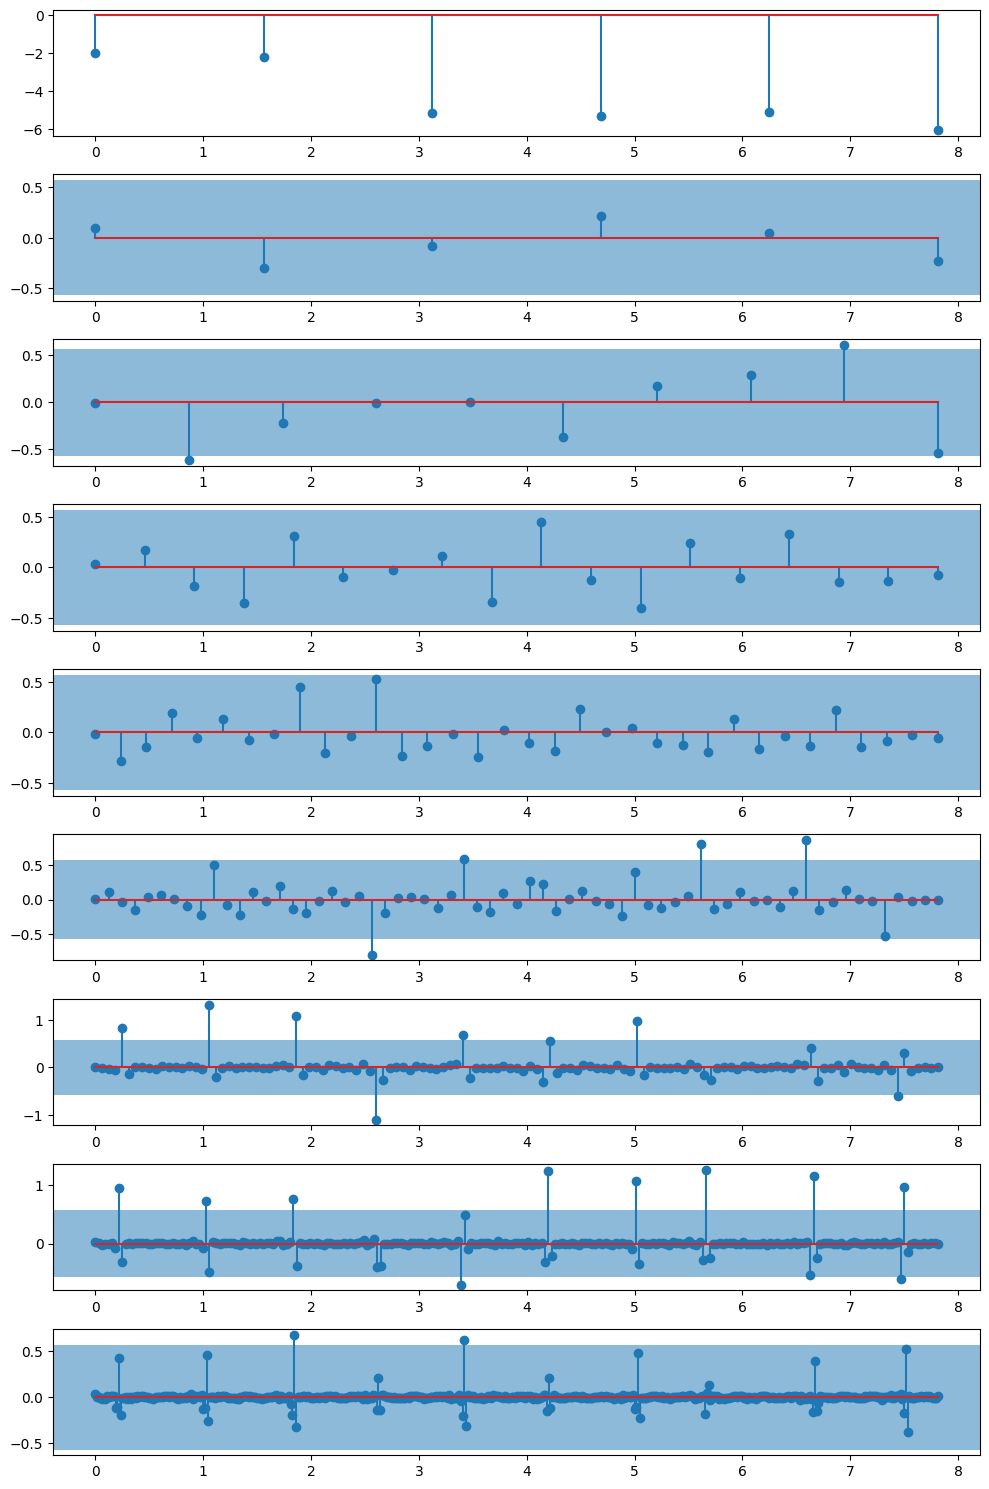

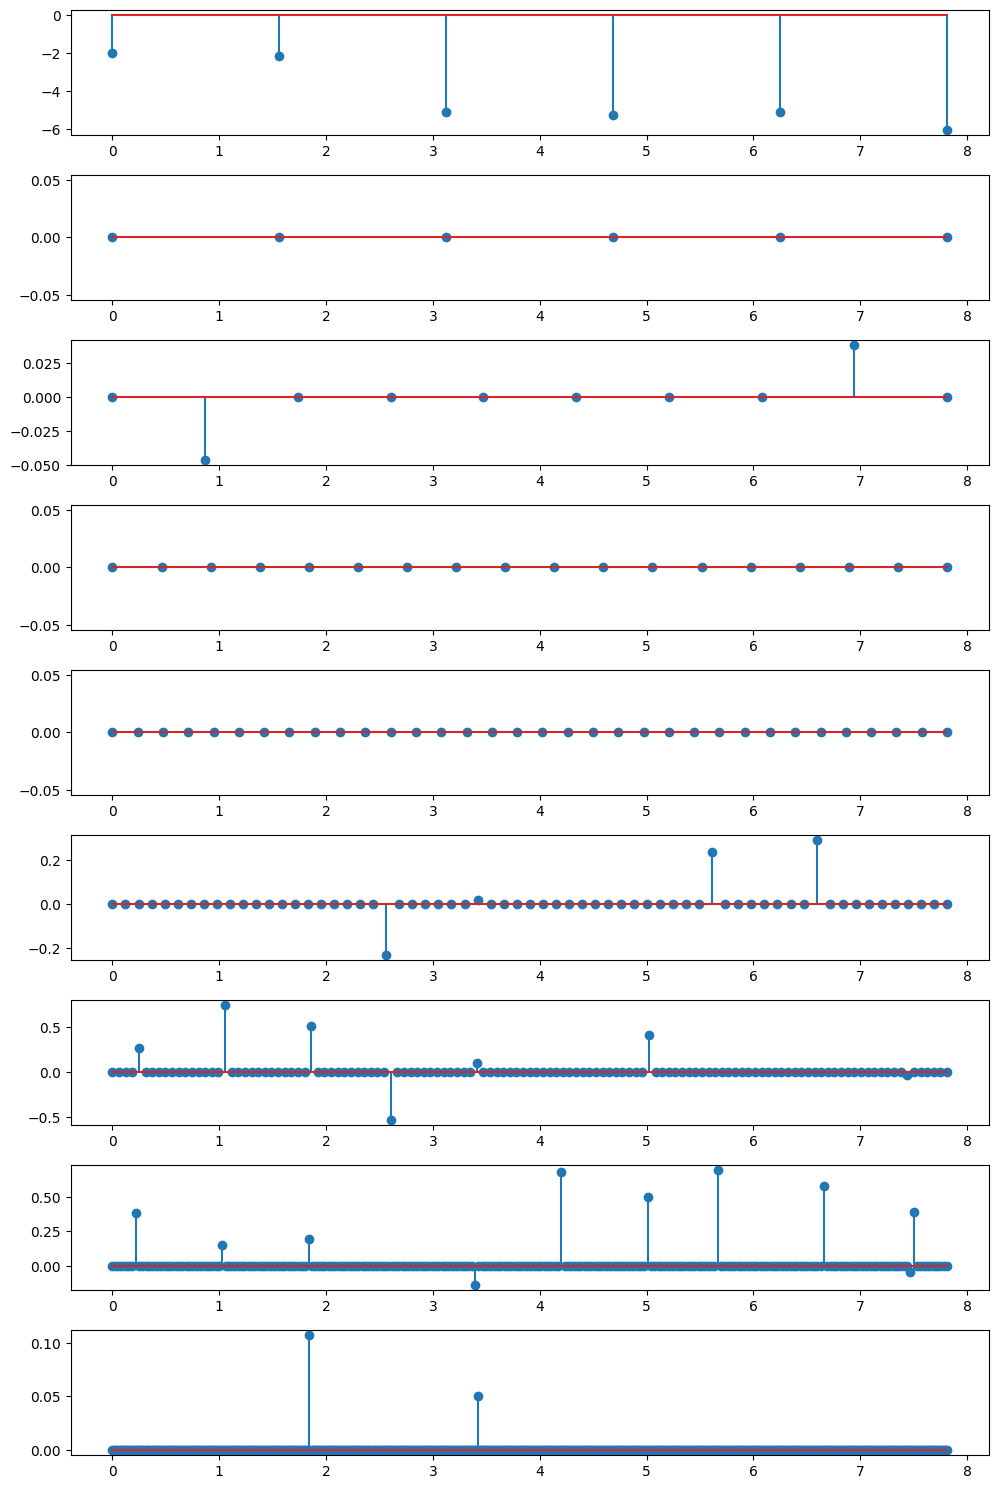

In [150]:
wavelet = 'db2'
thresh = 0.63
mode = 'symmetric'
max_level = pywt.dwt_max_level(len(signal), wavelet)
level = max_level
thresh = thresh*np.nanmax(signal)
# Wavelet decomposition up to 'level'. If level is None, it goes up to max level calculated with pywt.dwt_max_level
coeff = pywt.wavedec(signal, wavelet=wavelet, mode=mode, level=level )

fig, ax = plt.subplots(len(coeff), figsize=(10,15))
for i, c in enumerate(coeff):
    t = np.linspace(0, time_vector[-1], len(c))
    print(c.shape)
    ax[i].stem(t, c)
    if i>0:
        ax[i].axhspan(ymin=-thresh, ymax=thresh, alpha=0.5)
plt.tight_layout()

# Soft thresholding: coefficients higher than threshold are lowered to threshold value. (Hard thresholding makes them 0)
coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])

fig, ax = plt.subplots(len(coeff), figsize=(10,15))
for i, c in enumerate(coeff):
    t = np.linspace(0, time_vector[-1], len(c))
    print(c.shape)
    ax[i].stem(t, c)
    # if i>1:
    #     ax[i].axhspan(ymin=-thresh, ymax=thresh, alpha=0.5)
plt.tight_layout()

# Wavelet reconstruction
reconstructed_signal = pywt.waverec(coeff, wavelet, mode=mode)

In [124]:
def lowpassfilter(signal, thresh = 0.63, wavelet="db2", level=None, mode="symmetric"):
    thresh = thresh*np.nanmax(signal)
    # Wavelet decomposition up to 'level'. If level is None, it goes up to max level calculated with pywt.dwt_max_level
    coeff = pywt.wavedec(signal, wavelet, mode=mode, level=level )
    # Soft thresholding: coefficients higher than threshold are lowered to threshold value. (Hard thresholding makes them 0)
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    # Wavelet reconstruction
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode=mode)
    return reconstructed_signal

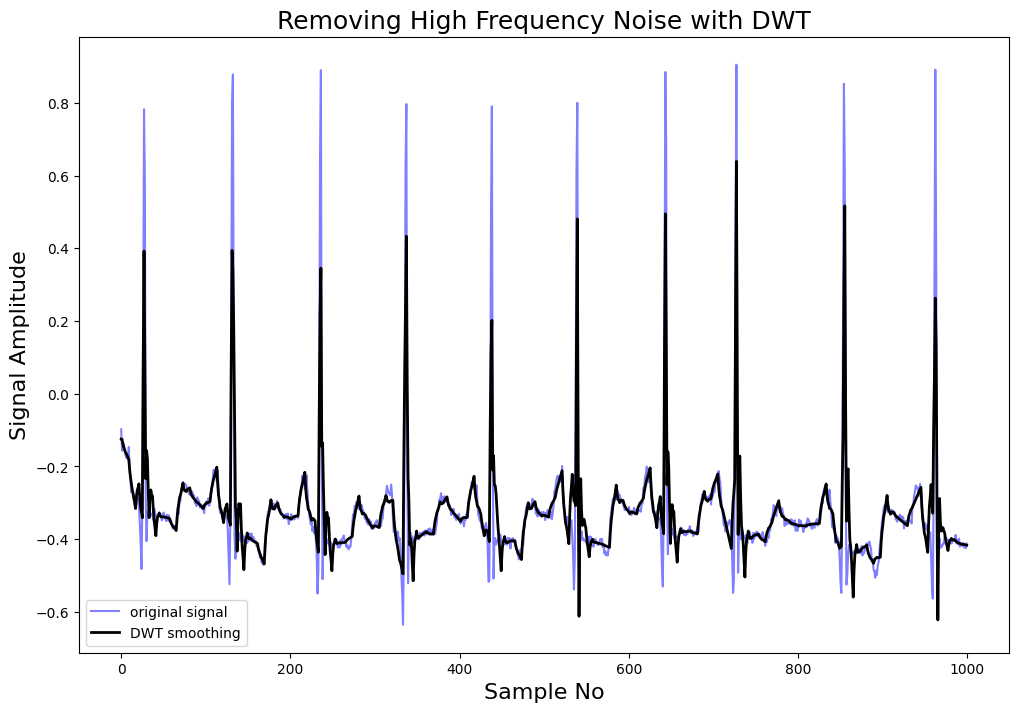

In [125]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4, level=3)
ax.plot(rec, 'k', label='DWT smoothing', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()

# Using the Discrete Wavelet Transform to classify signals

Continue from 3.5 here:

https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

In [11]:
import scipy
def calculate_entropy(list_values):
    counter_values = Counter(list_values).most_common()
    probabilities = [elem[1]/len(list_values) for elem in counter_values]
    entropy=scipy.stats.entropy(probabilities)
    return entropy
 
def calculate_statistics(list_values):
    n5 = np.nanpercentile(list_values, 5)
    n25 = np.nanpercentile(list_values, 25)
    n75 = np.nanpercentile(list_values, 75)
    n95 = np.nanpercentile(list_values, 95)
    median = np.nanpercentile(list_values, 50)
    mean = np.nanmean(list_values)
    std = np.nanstd(list_values)
    var = np.nanvar(list_values)
    rms = np.nanmean(np.sqrt(list_values**2))
    return [n5, n25, n75, n95, median, mean, std, var, rms]
 
def calculate_crossings(list_values):
    zero_crossing_indices = np.nonzero(np.diff(np.array(list_values), 0))[0]
    no_zero_crossings = len(zero_crossing_indices)
    mean_crossing_indices = np.nonzero(np.diff(np.array(list_values), np.nanmean(list_values)))[0]
    no_mean_crossings = len(mean_crossing_indices)
    return [no_zero_crossings, no_mean_crossings]
 
def get_features(list_values):
    entropy = calculate_entropy(list_values)
    # crossings = calculate_crossings(list_values)
    statistics = calculate_statistics(list_values)
    return [entropy] +statistics #+ crossings + statistics

Above we can see

    - a function to calculate the entropy value of an input signal,
    - a function to calculate some statistics like several percentiles, mean, standard deviation, variance, etc,
    - a function to calculate the zero crossings rate and the mean crossings rate,
    - and a function to combine the results of these three functions.

The final function returns a set of 12 features for any list of values. So if one signal is decomposed into 10 different sub-bands, and we generate features for each sub-band, we will end up with 10*12 = 120 features per signal.

## Apply DWT to classify UCI-HAR and ECG signals

### UCI-HArr

In [8]:
import os

def read_signals_ucihar(filename):
    with open(filename, 'r') as fp:
        data = fp.read().splitlines()
        data = map(lambda x: x.rstrip().lstrip().split(), data)
        data = [list(map(float, line)) for line in data]
    return data
 
def read_labels_ucihar(filename):        
    with open(filename, 'r') as fp:
        activities = fp.read().splitlines()
        activities = list(map(int, activities))
    return activities
 
def load_ucihar_data(folder):
    train_folder = folder + 'train/Inertial Signals/'
    test_folder = folder + 'test/Inertial Signals/'
    labelfile_train = folder + 'train/y_train.txt'
    labelfile_test = folder + 'test/y_test.txt'
    train_signals, test_signals = [], []
    for input_file in os.listdir(train_folder):
        signal = read_signals_ucihar(train_folder + input_file)
        train_signals.append(signal)
    train_signals = np.transpose(np.array(train_signals), (1, 2, 0))
    for input_file in os.listdir(test_folder):
        signal = read_signals_ucihar(test_folder + input_file)
        test_signals.append(signal)
    test_signals = np.transpose(np.array(test_signals), (1, 2, 0))
    train_labels = read_labels_ucihar(labelfile_train)
    test_labels = read_labels_ucihar(labelfile_test)
    return train_signals, train_labels, test_signals, test_labels

folder_ucihar = r'./datasets/UCI HAR Dataset/' 
train_signals_ucihar, train_labels_ucihar, test_signals_ucihar, test_labels_ucihar = load_ucihar_data(folder_ucihar)

### ECG

In [7]:
def load_ecg_data(filename):
    raw_data = sio.loadmat(filename)
    list_signals = raw_data['ECGData'][0][0][0]
    list_labels = list(map(lambda x: x[0][0], raw_data['ECGData'][0][0][1]))
    return list_signals, list_labels
 
 
##########
 
filename = './datasets/ECG_data/ECGData.mat'
data_ecg, labels_ecg = load_ecg_data(filename)
training_size = int(0.6*len(labels_ecg))
train_data_ecg = data_ecg[:training_size]
test_data_ecg = data_ecg[training_size:]
train_labels_ecg = labels_ecg[:training_size]
test_labels_ecg = labels_ecg[training_size:]

Load features and labels (ground truth)

In [12]:

def get_uci_har_features(dataset, labels, waveletname):
    uci_har_features = []
    for signal_no in range(0, len(dataset)):
        features = []
        for signal_comp in range(0,dataset.shape[2]):
            signal = dataset[signal_no, :, signal_comp]
            list_coeff = pywt.wavedec(signal, waveletname)
            for coeff in list_coeff:
                features += get_features(coeff)
        uci_har_features.append(features)
    X = np.array(uci_har_features)
    Y = np.array(labels)
    return X, Y
 
def get_ecg_features(ecg_data, ecg_labels, waveletname):
    list_features = []
    list_unique_labels = list(set(ecg_labels))
    list_labels = [list_unique_labels.index(elem) for elem in ecg_labels]
    for signal in ecg_data:
        list_coeff = pywt.wavedec(signal, waveletname)
        features = []
        for coeff in list_coeff:
            features += get_features(coeff)
        list_features.append(features)
    return list_features, list_labels
 
X_train_ecg, Y_train_ecg = get_ecg_features(train_data_ecg, train_labels_ecg, 'db4')
X_test_ecg, Y_test_ecg = get_ecg_features(test_data_ecg, test_labels_ecg, 'db4')
 
X_train_ucihar, Y_train_ucihar = get_uci_har_features(train_signals_ucihar, train_labels_ucihar, 'rbio3.1')
X_test_ucihar, Y_test_ucihar = get_uci_har_features(test_signals_ucihar, test_labels_ucihar, 'rbio3.1')

## Applyint CWT on El-Nino data

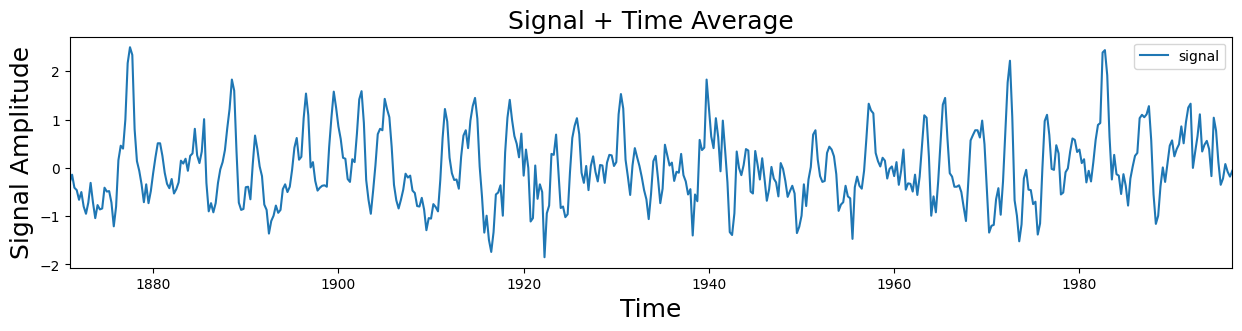

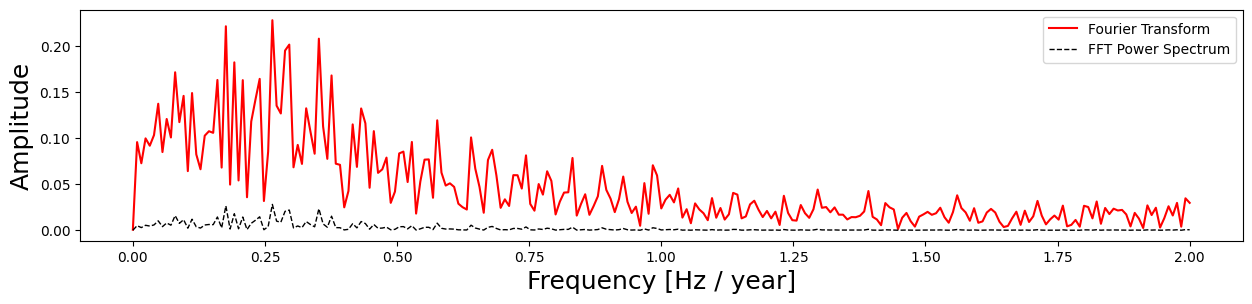

In [34]:
def plot_signal_plus_average(time, signal, average_over = 5):
    fig, ax = plt.subplots(figsize=(15, 3))
    # time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    # ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
    plt.show()
    
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
def plot_fft_plus_power(time, signal):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    
    fig, ax = plt.subplots(figsize=(15, 3))
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2     # FFT power spectrum
    ax.plot(f_values, fft_values, 'r-', label='Fourier Transform')
    ax.plot(f_values, fft_power, 'k--', linewidth=1, label='FFT Power Spectrum')
    ax.set_xlabel('Frequency [Hz / year]', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.legend()
    plt.show()
 
dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)
N = df_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = df_nino.values.squeeze()
 
plot_signal_plus_average(time, signal)
plot_fft_plus_power(time, signal)


c:\Miniconda\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


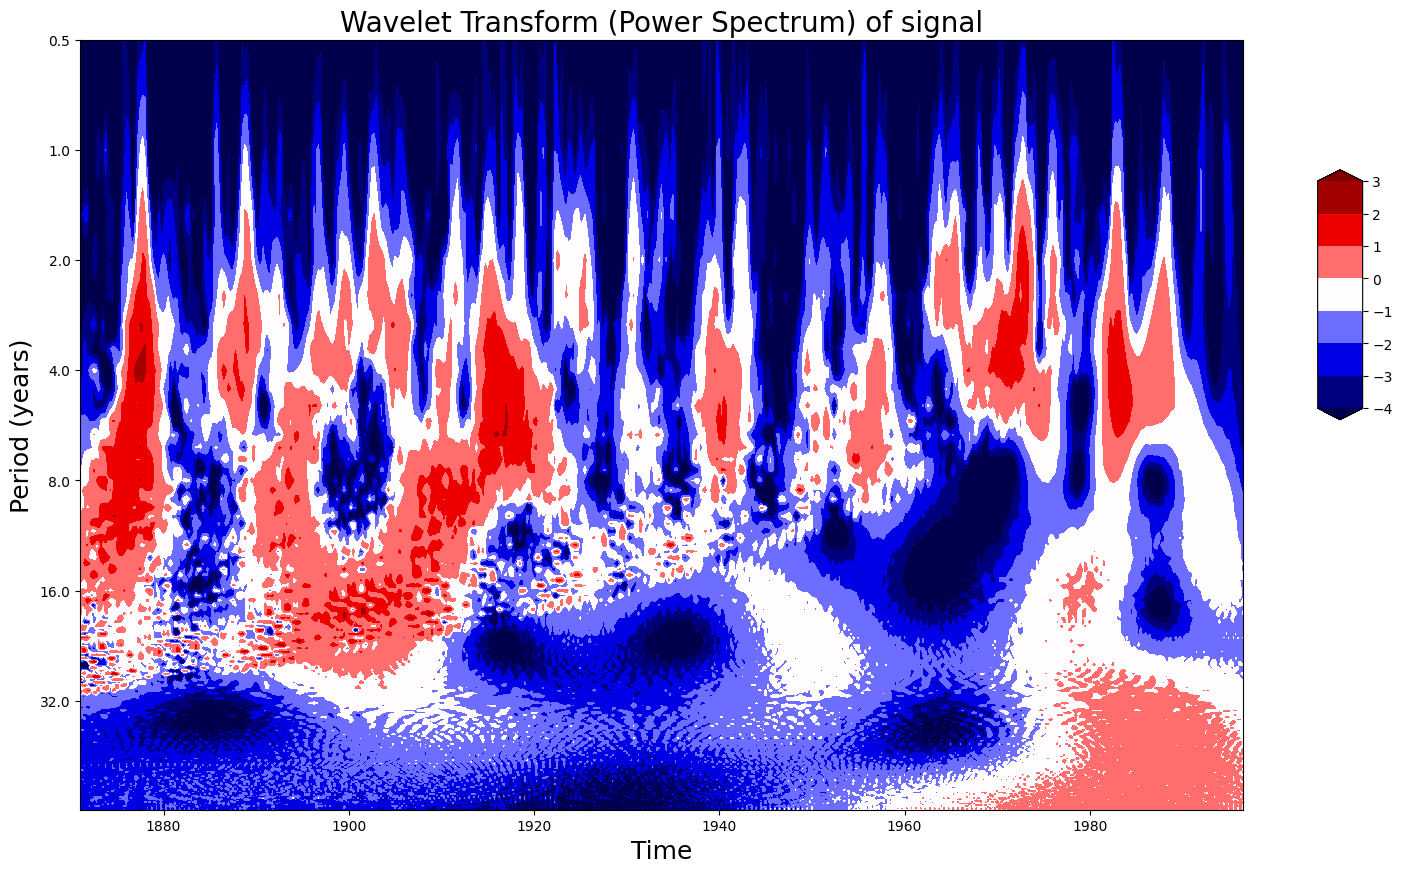

In [39]:
scales = np.arange(1, 128)

waveletname = 'cmor'
cmap = plt.cm.seismic
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (years)'
xlabel = 'Time'

dt = time[1] - time[0]
[coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
power = (abs(coefficients)) ** 2
period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
contourlevels = np.log2(levels)

fig, ax = plt.subplots(figsize=(15, 10))
im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)

ax.set_title(title, fontsize=20)
ax.set_ylabel(ylabel, fontsize=18)
ax.set_xlabel(xlabel, fontsize=18)

yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
fig.colorbar(im, cax=cbar_ax, orientation="vertical")
plt.show()


In [55]:
print(coefficients.shape, time.shape, frequencies.shape, power.shape)

(127, 503) (503,) (127,) (127, 503)


c:\Miniconda\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


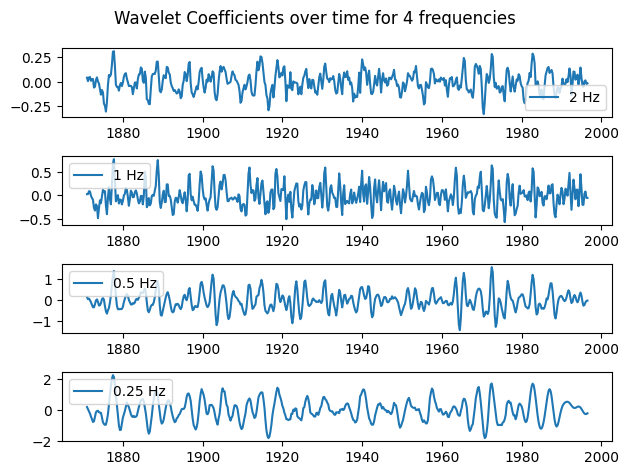

In [71]:
display_frequencies = [2, 1, 0.5, 0.25]
n_plots = len(display_frequencies)
fig, ax = plt.subplots(n_plots,1)
for i, freq in enumerate(display_frequencies):
    freq_index = np.argwhere(frequencies == freq)[0][0]
    ax[i].plot(time, coefficients[freq_index,:], label=str(freq) + ' Hz')
    ax[i].legend()
plt.suptitle('Wavelet Coefficients over time for 4 frequencies')
plt.tight_layout()

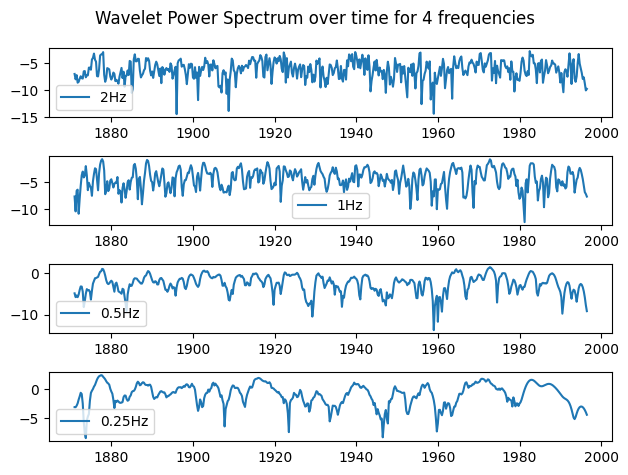

In [73]:
display_frequencies = [2, 1, 0.5, 0.25]
n_plots = len(display_frequencies)
fig, ax = plt.subplots(n_plots,1)
for i, freq in enumerate(display_frequencies):
    freq_index = np.argwhere(frequencies == freq)[0][0]
    ax[i].plot(time, np.log2(power[freq_index,:]), label=str(freq) + 'Hz')
    ax[i].legend()
plt.suptitle('Wavelet Power Spectrum over time for 4 frequencies')
plt.tight_layout()

# CWT with CNN

In [87]:
import os

def read_signals_ucihar(filename):
    with open(filename, 'r') as fp:
        data = fp.read().splitlines()
        data = map(lambda x: x.rstrip().lstrip().split(), data)
        data = [list(map(float, line)) for line in data]
    return data
 
def read_labels_ucihar(filename):        
    with open(filename, 'r') as fp:
        activities = fp.read().splitlines()
        activities = list(map(int, activities))
    return activities
 
def load_ucihar_data(folder):
    train_folder = folder + 'train/Inertial Signals/'
    test_folder = folder + 'test/Inertial Signals/'
    labelfile_train = folder + 'train/y_train.txt'
    labelfile_test = folder + 'test/y_test.txt'
    train_signals, test_signals = [], []
    for input_file in os.listdir(train_folder):
        signal = read_signals_ucihar(train_folder + input_file)
        train_signals.append(signal)
    train_signals = np.transpose(np.array(train_signals), (1, 2, 0))
    for input_file in os.listdir(test_folder):
        signal = read_signals_ucihar(test_folder + input_file)
        test_signals.append(signal)
    test_signals = np.transpose(np.array(test_signals), (1, 2, 0))
    train_labels = read_labels_ucihar(labelfile_train)
    test_labels = read_labels_ucihar(labelfile_test)
    return train_signals, train_labels, test_signals, test_labels

folder_ucihar = r'./datasets/UCI HAR Dataset/' 
train_signals_ucihar, train_labels_ucihar, test_signals_ucihar, test_labels_ucihar = load_ucihar_data(folder_ucihar)


In [89]:
scales = range(1,128)
waveletname = 'morl'
train_size = 5000
test_size= 500
 
train_data_cwt = np.ndarray(shape=(train_size, 127, 127, 9))
 
for ii in range(0,train_size):
    if ii % 1000 == 0:
        print(ii)
    for jj in range(0,9):
        signal = train_signals_ucihar[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:127]
        train_data_cwt[ii, :, :, jj] = coeff_
 
test_data_cwt = np.ndarray(shape=(test_size, 127, 127, 9))
for ii in range(0,test_size):
    if ii % 100 == 0:
        print(ii)
    for jj in range(0,9):
        signal = test_signals_ucihar[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:127]
        test_data_cwt[ii, :, :, jj] = coeff_
 
uci_har_labels_train = list(map(lambda x: int(x) - 1, train_labels_ucihar))
uci_har_labels_test = list(map(lambda x: int(x) - 1, test_labels_ucihar))
 
x_train = train_data_cwt
y_train = list(uci_har_labels_train[:train_size])
x_test = test_data_cwt
y_test = list(uci_har_labels_test[:test_size])

0
1000
2000
3000
4000
0
100
200
300
400


In [93]:
x_train.shape

(5000, 127, 127, 9)

In [ ]:
# # Need Keras
# import keras
# from keras.layers import Dense, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras.models import Sequential
# from keras.callbacks import History 
# history = History()
 
# img_x = 127
# img_y = 127
# img_z = 9
# input_shape = (img_x, img_y, img_z)
 
# num_classes = 6
# batch_size = 16
# num_classes = 7
# epochs = 10
 
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
 
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
 
 
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))
 
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adam(),
#               metrics=['accuracy'])
 
 
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test),
#           callbacks=[history])
 
# train_score = model.evaluate(x_train, y_train, verbose=0)
# print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
# test_score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))